In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import neattext.functions as nfx
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import missingno as msno

un data set est collection structuree de donnees, generalement organisee sous forme de tableau. chaque colonne represente une variable ou un attribut, tandis que chaque ligne correspond a une observation ou un enregistrement. le present data_set reprente un ensemble de donnee constitue des cours et plusieurs autre variable tel que:

'course_id': qui represente l'identifiant des cours

'course_title': qui represente le titre du cours

'url': qui represente le lien qui mene au cours

'is_paid' qui determine si un cours a ete payer ou non

'price': qui represente le prix d'un cours 

'num_subscribers': qui represente le nombre de souscrit a un cours

'num_reviews': qui represente 

'level': qui represente le niveau

'content_duration': qui represente la duree d'un contenu

'published_timetamp': qui represente le temps de publication d'un cours avec les minutes

'subject': represente la categorie dans laquelle est classee le cours

'profit': represente les benefices liee a un cours

'published_date': date de publication d'un cours

'published_time': represente l'heure de publication d'un cours

'year': represente l'annee de publication d'un cours

'month': represente le mois de publication d'un cours 

'day': represente le jour de publication de cours


In [3]:
data = pd.read_csv("udemy_course_data.csv")
data.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19


In [4]:
data.shape

(3683, 18)

le feature selection est une etape qui consiste a identifier et a conserver uniquement les variables pertinentes pour l'analyse ou la modelisation afin d'ameliorer les performance des modeles, de reduire la complexite et d'eviter le surapprentissage (overfitting) 
pour notre data_set nous avons les variables:

"course_id", "url", "published_timestamp", "published_time", "year", "month", "day"

In [5]:
data = data.drop(columns = ["course_id", "url", "published_timestamp", "published_time", "year", "month", "day"])
data.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5 hours,Business Finance,429400,2017-01-18
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39 hours,Business Finance,209400,2017-03-09
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5 hours,Business Finance,97830,2016-12-19


In [6]:
data.tail(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date
3680,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5 hours,Web Development,20520,2015-12-30
3681,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3 hours,Web Development,15000,2016-08-11
3682,Using MODX CMS to Build Websites: A Beginner's...,True,45,901,36,20,Beginner Level,2 hours,Web Development,40545,2014-09-28


In [7]:
data = data.drop_duplicates(keep='first')
data.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5 hours,Business Finance,429400,2017-01-18
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39 hours,Business Finance,209400,2017-03-09
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5 hours,Business Finance,97830,2016-12-19


In [8]:
def convert(hours):
    if 'hours' in hours:
        target =float(hours.replace("hours"," "))
        return target*60
    elif "mins" in hours:
        tmp = str(hours).replace("mins","")
        times= float(tmp)
        return times
    elif "questions" in hours:
        return 0
    elif "min" in hours:
        tmp= str(hours).replace("min"," ")
        times= float(tmp)
        return times
    else:
        return 0


In [9]:
tmp=[]
for datas in data['content_duration']:
    tmp.append(convert(datas))
data['content_duration']=tmp

In [10]:
data.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,90.0,Business Finance,429400,2017-01-18
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,2340.0,Business Finance,209400,2017-03-09
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,150.0,Business Finance,97830,2016-12-19
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,180.0,Business Finance,232845,2017-05-30
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,120.0,Business Finance,255200,2016-12-13


In [11]:
data = pd.DataFrame(data)
data['is_paid'].replace([True, False], [1, 0], inplace = True)
data.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,90.0,Business Finance,429400,2017-01-18
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,2340.0,Business Finance,209400,2017-03-09
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,150.0,Business Finance,97830,2016-12-19


In [12]:
data=data[data["level"]!="52"]

In [13]:
data.isna().sum()

course_title        0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
profit              0
published_date      0
dtype: int64

In [14]:
data.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,90.0,Business Finance,429400,2017-01-18
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,2340.0,Business Finance,209400,2017-03-09
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,150.0,Business Finance,97830,2016-12-19


In [15]:
df = pd.DataFrame(data)
#conversion de la colonne 'published_date' en duree
df['published_date']= pd.to_datetime(df['published_date'])
#calcul de la durre en jours
reference_date =pd.to_datetime('2024-05-01')
df['duration_days'] = (reference_date - df['published_date']).dt.days
df['duration_days'] = df['duration_days'].astype(float)
data.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,published_date,duration_days
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,90.0,Business Finance,429400,2017-01-18,2660.0
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,2340.0,Business Finance,209400,2017-03-09,2610.0
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,150.0,Business Finance,97830,2016-12-19,2690.0


In [16]:
data = data.drop(columns = [ "published_date"])
data.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,duration_days
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,90.0,Business Finance,429400,2660.0
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,2340.0,Business Finance,209400,2610.0
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,150.0,Business Finance,97830,2690.0


In [17]:
text_string = "La variable à expliquer de cette étude est: {}" 
print(text_string.format("course_title"))
text_string = "Le jeu de données contient: {} lignes et {} colonnes."
print(text_string.format(data.shape[0], data.shape[1]))

La variable à expliquer de cette étude est: course_title
Le jeu de données contient: 3676 lignes et 11 colonnes.


In [18]:
data.isnull().sum()

course_title        0
is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
profit              0
duration_days       0
dtype: int64

## ANALYSE DESCRIPTIVE DES DONNEES

L'analyse descriptive des données est une méthode statistique qui permet de résumer et de décrire les principales caractéristiques d'un ensemble de données. Elle fournit des informations essentielles sur la distribution, la tendance centrale et la variabilité des données, sans faire d'inférences ou de généralisations.

In [19]:
data.dropna(inplace= True)

In [20]:
dtype=['object', 'int64', 'int64', 'int64', 'int64', 'int64', 'object', 'object', 'object', 'int64', 'int64' ]        

types= pd.DataFrame({'data':dtype, 'elt': [1,3,5,7,2,9,0,6,12,1,34]})
types.head()
                    

,data,elt
0,object,1
1,int64,3
2,int64,5
3,int64,7
4,int64,2


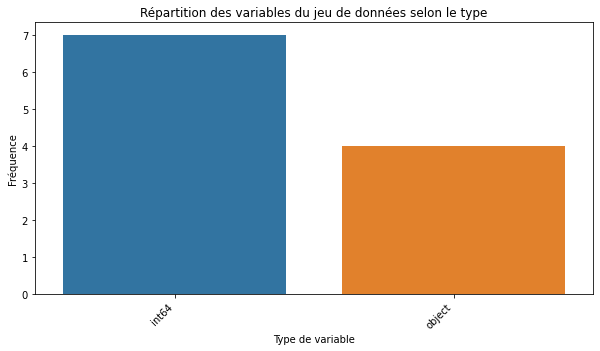

In [21]:
freq = types.data.value_counts()
freq = freq.sort_values(axis = 0, ascending = False)
plt.figure(figsize = (10, 5))

sns.barplot(x = freq.index, y = freq.values)
plt.xticks(rotation = 45, ha = "right")
plt.title("Répartition des variables du jeu de données selon le type")
plt.ylabel("Fréquence")
plt.xlabel("Type de variable")
plt.show()

In [22]:
print("Le jeu de données contient 7 variables (explicatives) quantitatives")
print("Le jeu de données contient 4 variables (explicatives) qualitatives")

Le jeu de données contient 7 variables (explicatives) quantitatives
Le jeu de données contient 4 variables (explicatives) qualitatives


<Figure size 432x288 with 0 Axes>

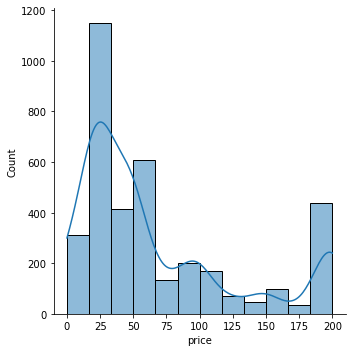

In [23]:
plt.figure()
sns.displot(data['price'], bins = 12, kde = True) 
plt.show()

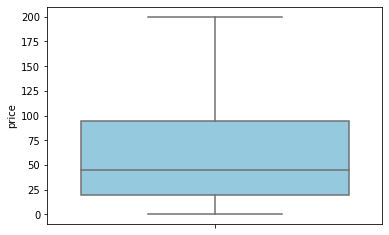

In [24]:
plt.figure()
sns.boxplot(data = data, y = 'price', color = 'skyblue')
plt.show()

In [25]:
(data[data['price']<200].shape[0]/ data.shape[0])*100

91.97497279651795

<Figure size 432x288 with 0 Axes>

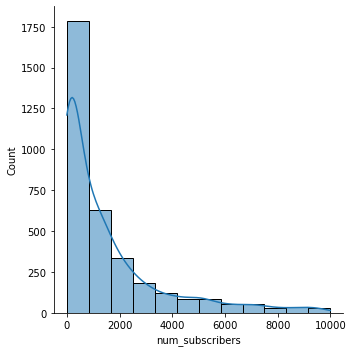

In [26]:
plt.figure()
sns.displot(data['num_subscribers'][data['num_subscribers']<10000], bins = 12, kde = True) 
plt.show()

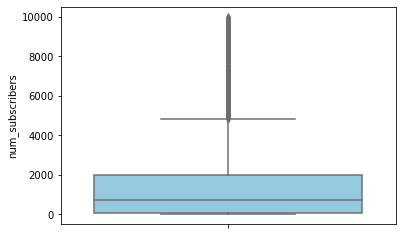

In [27]:
plt.figure()
sns.boxplot(data = data[data['num_subscribers']< 10000], y = 'num_subscribers', color = 'skyblue')
plt.show()

In [28]:
(data[data['price']<27445].shape[0]/ data.shape[0])*100

100.0

<Figure size 432x288 with 0 Axes>

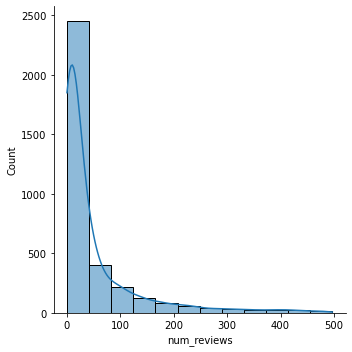

In [29]:
plt.figure()
sns.displot(data['num_reviews'][data['num_reviews']<500], bins = 12, kde = True) 
plt.show()

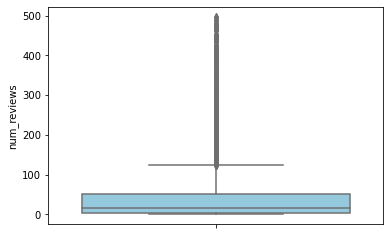

In [30]:
plt.figure()
sns.boxplot(data = data[data['num_reviews']< 500], y = 'num_reviews', color = 'skyblue')
plt.show()

In [31]:
(data[data['price']<268923].shape[0]/ data.shape[0])*100

100.0

<Figure size 432x288 with 0 Axes>

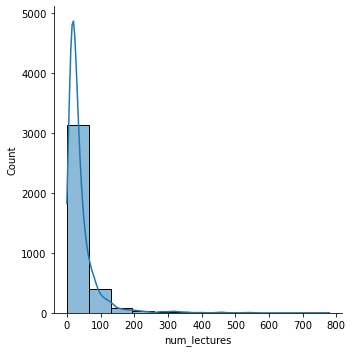

In [32]:
plt.figure()
sns.displot(data['num_lectures'], bins = 12, kde = True) 
plt.show()

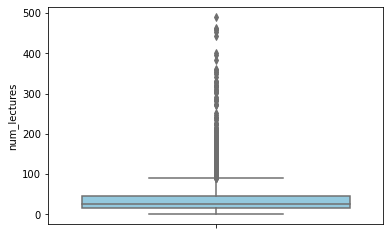

In [33]:
plt.figure()
sns.boxplot(data = data[data['num_lectures']< 500], y = 'num_lectures', color = 'skyblue')
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_title      3676 non-null   object 
 1   is_paid           3676 non-null   int64  
 2   price             3676 non-null   int64  
 3   num_subscribers   3676 non-null   int64  
 4   num_reviews       3676 non-null   int64  
 5   num_lectures      3676 non-null   int64  
 6   level             3676 non-null   object 
 7   content_duration  3676 non-null   float64
 8   subject           3676 non-null   object 
 9   profit            3676 non-null   int64  
 10  duration_days     3676 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 344.6+ KB


<Figure size 432x288 with 0 Axes>

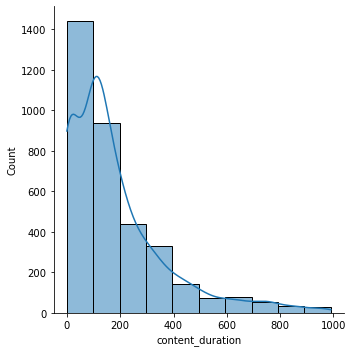

In [35]:
plt.figure()
sns.displot(data['content_duration'][data['content_duration']<1000], bins = 10, kde = True) 
plt.show()

In [36]:
data.content_duration=data.content_duration.astype(float)

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_paid,3676.0,0.915669,2.779211e-01,0.0,1.00,1.0,1.00,1.0
price,3676.0,66.063656,6.101431e+01,0.0,20.00,45.0,95.00,200.0
num_subscribers,3676.0,3187.668934,9.483366e+03,0.0,111.00,912.0,2544.00,268923.0
num_reviews,3676.0,156.205114,9.356826e+02,0.0,4.00,18.0,67.00,27445.0
num_lectures,3676.0,40.096572,5.040704e+01,0.0,15.00,25.0,46.00,779.0
content_duration,3676.0,235.697497,3.690533e+02,0.0,44.00,120.0,270.00,4710.0
profit,3676.0,239862.899891,1.000437e+06,0.0,1618.75,23175.0,118650.00,24316800.0
duration_days,3676.0,3078.443145,4.150158e+02,2491.0,2740.75,3017.0,3333.25,4680.0


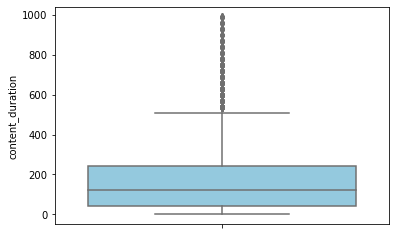

In [38]:
plt.figure()
sns.boxplot(data = data[data["content_duration"]<1000], y = 'content_duration', color = 'skyblue')
plt.show()

<Figure size 432x288 with 0 Axes>

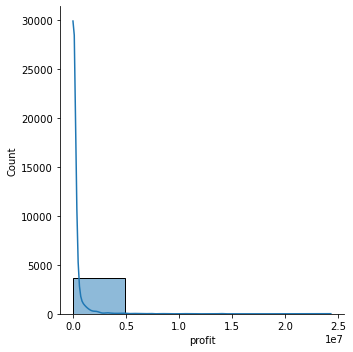

In [39]:
plt.figure()
sns.displot(data['profit'], bins = 5, kde = True) 
plt.show()

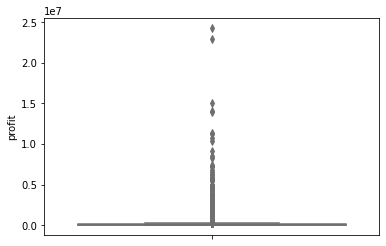

In [40]:
plt.figure()
sns.boxplot(data = data, y = 'profit', color = 'skyblue')
plt.show()

<Figure size 432x288 with 0 Axes>

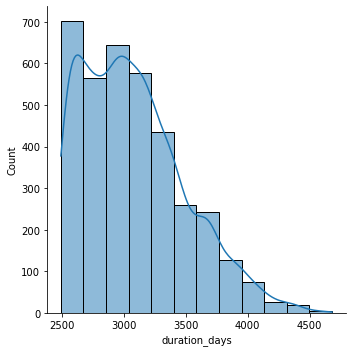

In [41]:
plt.figure()
sns.displot(data['duration_days'], bins = 12, kde = True) 
plt.show()

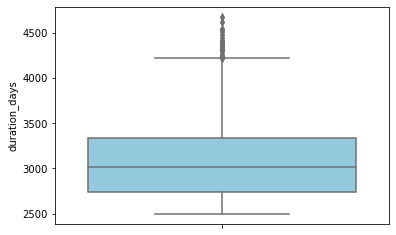

In [42]:
plt.figure()
sns.boxplot(data = data, y = 'duration_days', color = 'skyblue')
plt.show()

<Figure size 432x288 with 0 Axes>

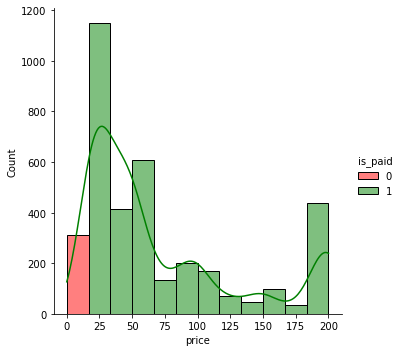

In [43]:
plt.figure()
sns.displot(data = data, 
                x = "price",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               )  
plt.show()

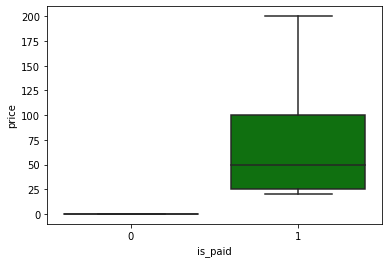

In [44]:
plt.figure()
sns.boxplot(data = data, 
            x = "is_paid",
            y = "price",
            palette = ["red", "green"]
           ) 
plt.show()

<Figure size 432x288 with 0 Axes>

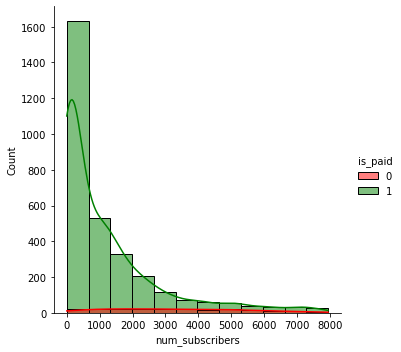

In [45]:
plt.figure()
sns.displot(data = data[data["num_subscribers"]<8000], 
                x = "num_subscribers",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               ) 
plt.show()

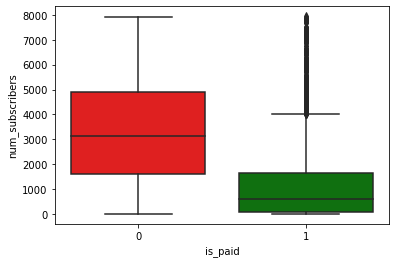

In [46]:
plt.figure()
sns.boxplot(data = data[data["num_subscribers"]<8000], 
            x = "is_paid",
            y = "num_subscribers",
            palette = ["red", "green"]
           ) 
plt.show()

In [47]:
data.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'subject', 'profit',
       'duration_days'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

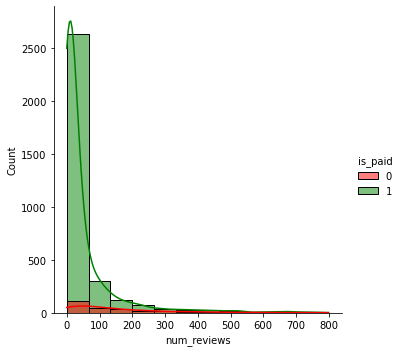

In [48]:
plt.figure()
sns.displot(data = data[data["num_reviews"]<800], 
                x = "num_reviews",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               ) 
plt.show()

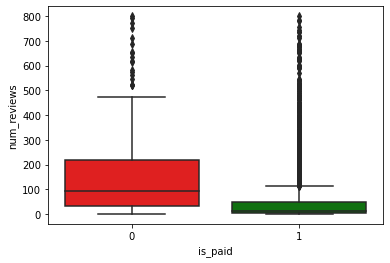

In [49]:
plt.figure()
sns.boxplot(data = data[data["num_reviews"]<800], 
             x = "is_paid",
             y = "num_reviews",
            palette = ["red", "green"]
        
           ) 
plt.show()

<Figure size 432x288 with 0 Axes>

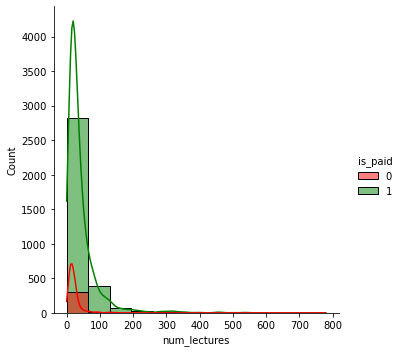

In [50]:
plt.figure()
sns.displot(data = data, 
                x = "num_lectures",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               ) 
plt.show()

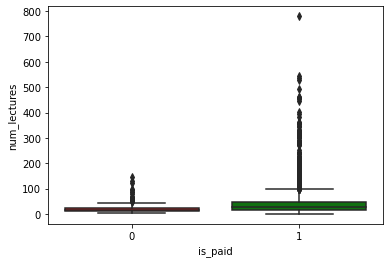

In [51]:
plt.figure()
sns.boxplot(data = data[data["num_lectures"]<800], 
             x = "is_paid",
             y = "num_lectures",
            palette = ["red", "green"]
        
           ) 
plt.show()

<Figure size 432x288 with 0 Axes>

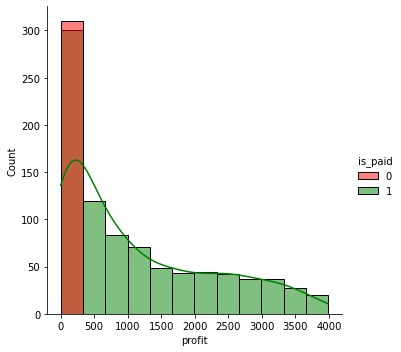

In [52]:
plt.figure()
sns.displot(data = data[data['profit']<4000], 
                x = "profit",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               ) 
plt.show()

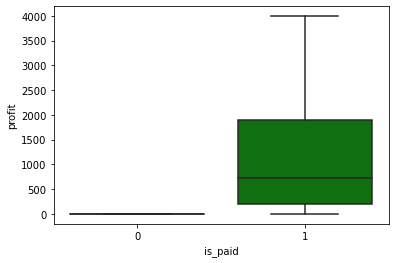

In [53]:
plt.figure()
sns.boxplot(data = data[data["profit"]<4000], 
             x = "is_paid",
             y = "profit",
            palette = ["red", "green"]
        
           ) 
plt.show()

<Figure size 432x288 with 0 Axes>

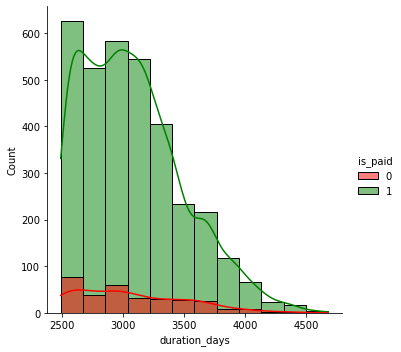

In [54]:
plt.figure()
sns.displot(data = data, 
                x = "duration_days",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               ) 
plt.show()

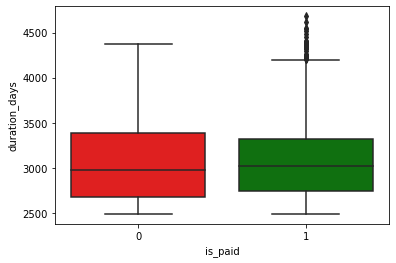

In [55]:
plt.figure()
sns.boxplot(data = data, 
             x = "is_paid",
             y = "duration_days",
            palette = ["red", "green"]
        
           ) 
plt.show()

<Figure size 432x288 with 0 Axes>

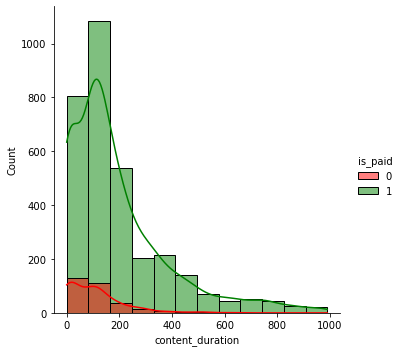

In [56]:
plt.figure()
sns.displot(data = data[data["content_duration"]<1000], 
                x = "content_duration",
                hue = "is_paid",
                bins = 12, 
                kde = True,
                palette = ["red", "green"]
               ) 
plt.show()

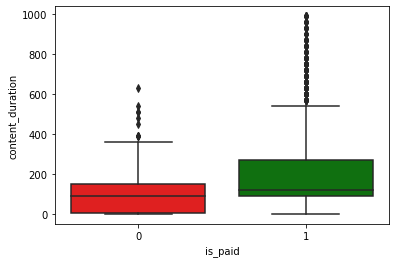

In [57]:
plt.figure()
sns.boxplot(data = data[data["content_duration"]<1000], 
             x = "is_paid",
             y = "content_duration",
            palette = ["red", "green"]
        
           ) 
plt.show()

In [58]:
data.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

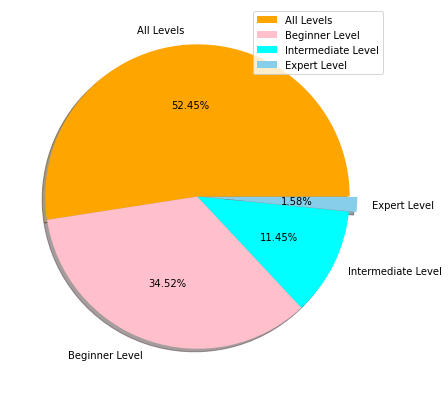

In [59]:
freq = data["level"].value_counts(normalize = True) * 100
freq = np.round(freq, 2)

plt.figure(figsize = (7, 7))
plt.pie(freq, 
        labels = ["All Levels", "Beginner Level", "Intermediate Level", "Expert Level"],
        colors = ["orange", "pink", "cyan", "skyblue"],
        explode = [0, 0, 0, 0.05],
        autopct = lambda x: str(np.round(x, 2)) + "%",
        shadow = True
       )
plt.legend()
plt.show()

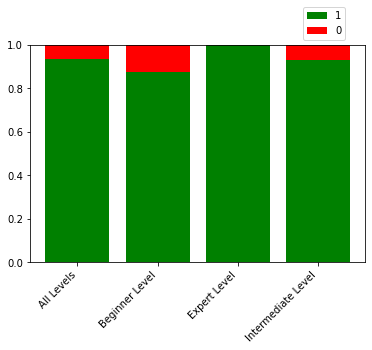

In [60]:
table = pd.crosstab(data["is_paid"], data["level"])
table = (table / table.sum(axis = 0))

is_paid = list(table.index)
level = list(table.columns)

plt.bar(level, table.iloc[1, :], color = "green", label = is_paid[1])
plt.bar(level, table.iloc[0, :], color = "red", label = is_paid[0],
        bottom = np.array(table.iloc[1, :]))

plt.xticks(range(len(level)), 
           level,
          rotation = 45,
          ha = "right")
plt.legend(loc = "lower left", bbox_to_anchor = (0.8, 1.0))
plt.show()

Le jeu de données est composé de: 91.57 cours acheté
Le jeu de données est composé de: 8.43 cours non acheté


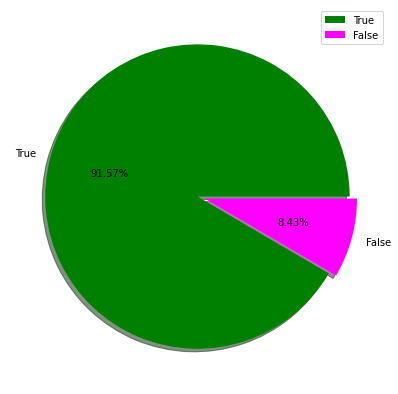

In [61]:
freq = data["is_paid"].value_counts(normalize = True) * 100
freq = np.round(freq, 2)
print(f"Le jeu de données est composé de: {freq[1]} cours acheté")
print(f"Le jeu de données est composé de: {freq[0]} cours non acheté")

plt.figure(figsize = (7, 7))
plt.pie(freq, 
        labels = ["True", "False"],
        colors = ["green", "magenta"],
        explode = [0, 0.05],
        autopct = lambda x: str(np.round(x, 2)) + "%",
        shadow = True
       )
plt.legend()
plt.show()

In [62]:
freq = data["is_paid"].value_counts()
print(freq)

1    3366
0     310
Name: is_paid, dtype: int64


In [63]:
from   scipy.stats import chi2_contingency, ttest_ind, shapiro
from   scipy.stats import mannwhitneyu, kruskal, wilcoxon

def khi2_test(data, var, target = "is_paid", alpha = 0.05):
    cross_tab = pd.crosstab(data[var], data[target])
    chi2_stat, p_value, ddl, effectifs_theoriques = chi2_contingency(cross_tab)       
    
    if (p_value < alpha):
        message = "L'hypothèse H0 est rejetée !" 
    else:
        message = "L'on ne peut conclure au rejet de l'hypothèse H0 !"
    
    n = data.shape[0]
    k = min(cross_tab.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * k))
    
    return(message, cramer_v)

In [64]:
khi2_test(data=data, var="level")

("L'hypothèse H0 est rejetée !", 0.1092390749028271)

In [65]:
positive = data[data["is_paid"] == 1]
negative = data[data["is_paid"] == 0]
print(negative.shape)
print(positive.shape)

(310, 11)
(3366, 11)


In [66]:
shapiro(negative["is_paid"])

C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ShapiroResult(statistic=1.0, pvalue=1.0)

In [67]:
np.random.seed(2)
shapiro(negative["is_paid"])

ShapiroResult(statistic=1.0, pvalue=1.0)

In [68]:
np.random.seed(2)
shapiro(positive["is_paid"])

ShapiroResult(statistic=1.0, pvalue=1.0)

In [69]:
def student_test(data, var, target = "is_paid", alpha = 0.05):
    positive = data[(data[target] == 1)]
    negative = data[(data[target] == 0)]
    if (positive.shape[0] > negative.shape[0]):
        positive = positive.sample(negative.shape[0])
    else:
        negative = negative.sample(positive.shape[0])
        
    stat, p_value = ttest_ind(negative[var].dropna(), positive[var].dropna())
    if (p_value < alpha):
        message = "L'hypothèse H0 est rejetée !" 
    else:
        message = "L'on ne peut conclure au rejet de l'hypothèse H0 !"
    
    return(message)

In [70]:
for variable in data.select_dtypes("int64","float"):
    test = student_test(data, variable)
    print(f"{variable :-<30} {test}")

is_paid----------------------- L'hypothèse H0 est rejetée !
price------------------------- L'hypothèse H0 est rejetée !
num_subscribers--------------- L'hypothèse H0 est rejetée !
num_reviews------------------- L'hypothèse H0 est rejetée !
num_lectures------------------ L'hypothèse H0 est rejetée !
profit------------------------ L'hypothèse H0 est rejetée !


In [71]:
for variable in data.select_dtypes("float"):
    test = student_test(data, variable)
    print(f"{variable :-<30} {test}")

content_duration-------------- L'hypothèse H0 est rejetée !
duration_days----------------- L'on ne peut conclure au rejet de l'hypothèse H0 !


In [72]:
def mannwhiteney_test(data, var, target = "is_paid", alpha = 0.05):
    positive = data[(data[target] == 1)]
    negative = data[(data[target] == 0)]
    if (positive.shape[0] > negative.shape[0]):
        positive = positive.sample(negative.shape[0])
    else:
        negative = negative.sample(positive.shape[0])
        
    stat, p_value = mannwhitneyu(negative[var].dropna(), positive[var].dropna())
    if (p_value < alpha):
        message = "L'hypothèse H0 est rejetée !" 
    else:
        message = "L'on ne peut conclure au rejet de l'hypothèse H0 !"
    
    return(message)

In [73]:
for variable in data.select_dtypes("int64"):
    test = mannwhiteney_test(data, variable)
    print(f"{variable :-<50} {test}")

is_paid------------------------------------------- L'hypothèse H0 est rejetée !
price--------------------------------------------- L'hypothèse H0 est rejetée !
num_subscribers----------------------------------- L'hypothèse H0 est rejetée !
num_reviews--------------------------------------- L'hypothèse H0 est rejetée !
num_lectures-------------------------------------- L'hypothèse H0 est rejetée !
profit-------------------------------------------- L'hypothèse H0 est rejetée !


In [74]:
for variable in data.select_dtypes("float"):
    test = mannwhiteney_test(data, variable)
    print(f"{variable :-<50} {test}")

content_duration---------------------------------- L'hypothèse H0 est rejetée !
duration_days------------------------------------- L'on ne peut conclure au rejet de l'hypothèse H0 !


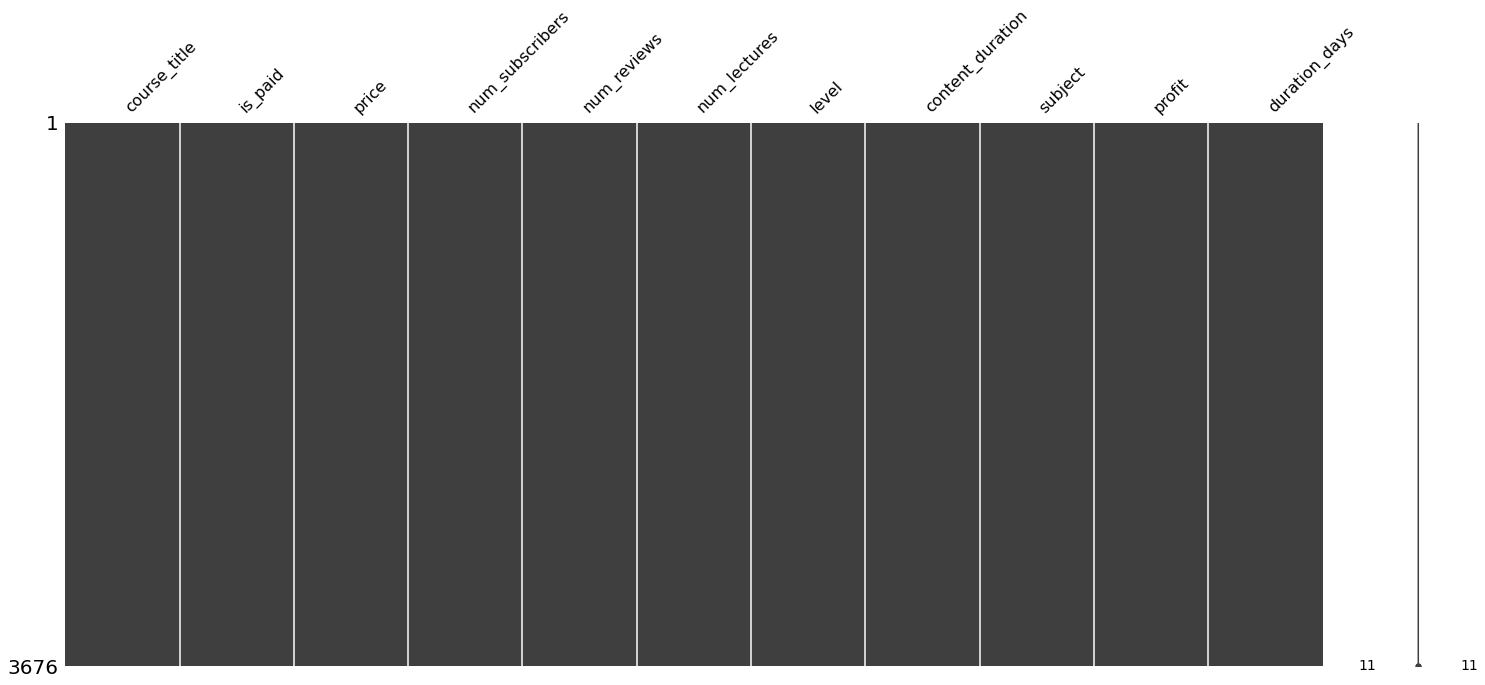

In [75]:
msno.matrix(data)
plt.show()

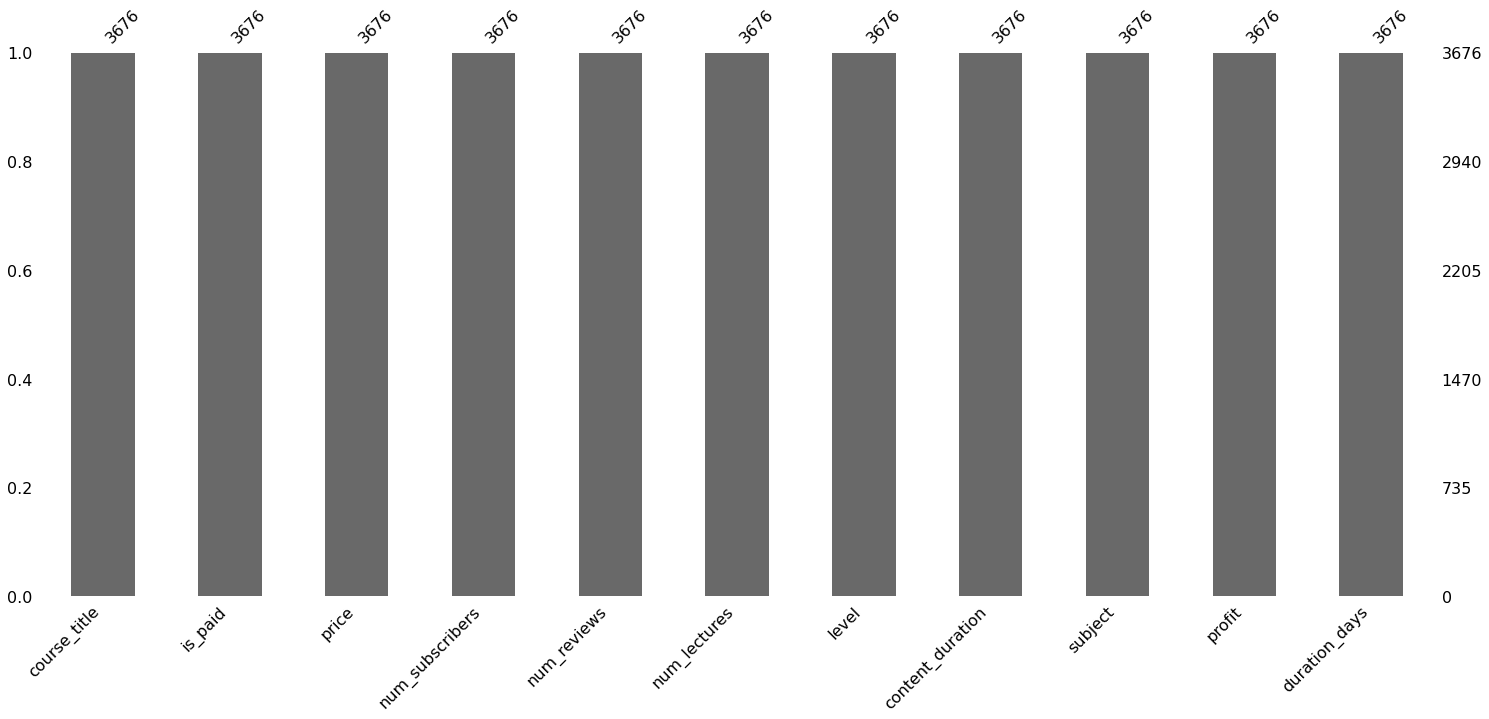

In [76]:
msno.bar(data)
plt.show()

In [77]:
listes=['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'duration_days']
data[listes].corr()

,price,num_subscribers,num_reviews,num_lectures,content_duration,duration_days
price,1.000000,0.050606,0.113650,0.330280,0.297735,-0.148243
num_subscribers,0.050606,1.000000,0.651082,0.158534,0.162713,0.186389
num_reviews,0.113650,0.651082,1.000000,0.243073,0.228200,0.053869
num_lectures,0.330280,0.158534,0.243073,1.000000,0.802714,0.019727
content_duration,0.297735,0.162713,0.228200,0.802714,1.000000,0.058668
duration_days,-0.148243,0.186389,0.053869,0.019727,0.058668,1.000000


## descriptions des correlations 
la matrice de correlatioon est un tableau qui affiche les coefficients de correlation entre plusieurs variables. chaque cellule de la matrice represente entre deux variables specifiques. les valeurs de correlation varient generalement entre -1 et 1 

price et num_subscribers: ont une correlation faible (0,05)
price et num_reviews : ont une correelation faible (0,11)


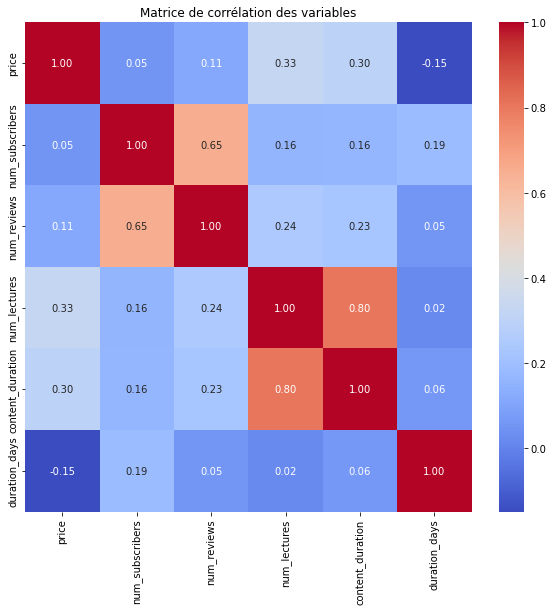

In [85]:
plt.figure(figsize=(10, 9))
sns.heatmap(data[listes].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation des variables')
plt.show()